# Создание нейросети

##Импортируем библиотеки

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model



##Устанавливаем датасет

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Визуализируем одно из чисел

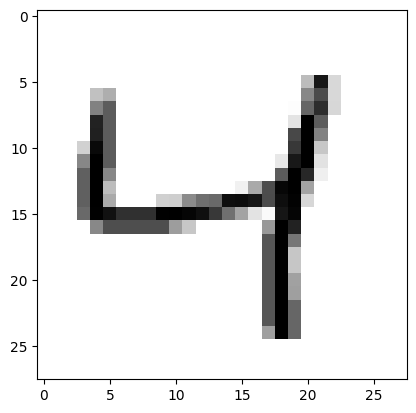

In [ ]:
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

## Рассмотрим, что нам дано в качестве целевой функции

In [ ]:
print(y_train[2]) # число (класс объекта на картинке)

4


## Создаём модель как объект класса [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

In [ ]:
model = Sequential()

##Преобразуем двумерные данные изображения в одномерные (преобразуем матрицу пикселей 28х28 в вектор 1x784). Это можно сделать двумя способами: добавить в модель слой  [Flatten()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) либо функцией reshape() из библиотеки numpy.

In [ ]:
model.add(Flatten())

image_data = np.random.rand(28, 28)
reshaped_data = image_data.reshape(1, 784)

##Добавляем два слоя  [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), используя команду add(). Пусть в каждом слое будет 128 узлов, а функцией активации будет [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu).

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

##Необходимо, чтобы модель выполняла роль классификатора. Для этого на выходе нейросети добавляют слой  [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) с функцией активации  [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax). Добавим такой слой, поскольку мы классифицируем данные на 10 классов (цифры от 0 до 9), то количество узлов должно быть равно 10.

In [ ]:
model.add(Dense(10, activation='softmax'))


## "Скомпелируем" модель. Для этого используем метод  [compile()](https://keras.io/api/models/model_training_apis/). В качестве аргументов передадим: оптимизатор 'adam', функцию потерь 'sparse_categorical_crossentropy' и метрику эффективности 'accuracy'.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


##Обучим модель на данных x_train, y_train с помощью метода fit(). Зададим 10 эпох обучения.

In [ ]:
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.4863 - accuracy: 0.8647
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3872 - accuracy: 0.9166
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2840 - accuracy: 0.9341
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2024 - accuracy: 0.9484
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1579 - accuracy: 0.9572
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1318 - accuracy: 0.9633
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1221 - accuracy: 0.9659
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1103 - accuracy: 0.9690
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1112 - accuracy: 0.9699
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step 

## Определим точность и величину потерь с помощью метода evaluate(). Сделаем это на проверочных данных x_test, y_test.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.1912 - accuracy: 0.9609


## Сохраним модель методом save()

In [ ]:
model.save('my_model')


## [Загрузим модель обратно](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model).

In [ ]:
loaded_model = load_model('my_model')


##Сделаем предсказание методом predict() на проверочной выборке x_test.

In [ ]:
predictions = loaded_model.predict(x_test)


313/313 [==============================] - 2s 5ms/step


##Выведем первое предсказание на экран.

In [ ]:
print(predictions[0])

[3.2097225e-15 2.9628682e-06 2.0738615e-07 2.2931839e-05 1.0899181e-15
 3.0153506e-09 2.3040554e-25 9.9997050e-01 1.2067898e-09 3.2793268e-06]
